In [1]:
cat("META LEARNERS")

META LEARNERS

In [2]:
cat("

Meta-learners are a class of methods that use machine learning algorithms to estimate HETEROGENEOUS TREATMENT EFFECTS

They're called META because they're frameworks that work on top of any base ML algorithm (random forests, neural networks, boosting, etc.).

Meta-learners convert standard supervised ML into causal effect estimators.

They solve the problem:

How does outcome Y change when treatment W changes, after adjusting for features X?

They work in two steps:

1. First use ML models to predict certain components (like outcomes or treatment probabilities).

2. Combine those predictions into estimates of treatment effect.

")



Meta-learners are a class of methods that use machine learning algorithms to estimate HETEROGENEOUS TREATMENT EFFECTS

They're called META because they're frameworks that work on top of any base ML algorithm (random forests, neural networks, boosting, etc.).

Meta-learners convert standard supervised ML into causal effect estimators.

They solve the problem:

How does outcome Y change when treatment W changes, after adjusting for features X?

They work in two steps:

1. First use ML models to predict certain components (like outcomes or treatment probabilities).

2. Combine those predictions into estimates of treatment effect.



In [3]:
cat("

🧠 The 3 Most Popular Metalearners :

1️⃣ T-Learner (Two-Model Learner)

Fit one ML model to predict outcome for CONTROLS

Fit another ML model for TREATED

TREATMENT EFECT = DIFFERENCE

2️⃣ S-Learner (Single-Model Learner)

One model for everyone.

How it works: Fit a single ML model; Then estimate treatment effect.

3️⃣ X-Learner (Cross-Learner)

Most sophisticated of the “ABC” metalearners.

Compute IMPUTED treatment effects ;
Fit ML models to predict these imputed tau’s ; 
Combine them using PROPENSITY SCORES. 

Excellent when treatment is UNBALANCED.

| Metalearner   | How many models? | Best when                 | Weakness                |
| ------------- | ---------------- | ------------------------- | ----------------------- |
| **T-Learner** | 2                | Groups very different     | Unstable if small group |
| **S-Learner** | 1                | Strong predictors in X    | W may be ignored        |
| **X-Learner** | 4+               | Observational, unbalanced | Complex pipeline        |

🔥 Why Metalearners Work So Well

Because they:

separate prediction from causal estimation

allow any ML model (RF, GBM, NN, etc.)

capture nonlinearities and interactions in X

estimate CATE (Conditional Average Treatment Effect)

allow high-dimensional data

")



🧠 The 3 Most Popular Metalearners :

1️⃣ T-Learner (Two-Model Learner)

Fit one ML model to predict outcome for CONTROLS

Fit another ML model for TREATED

TREATMENT EFECT = DIFFERENCE

2️⃣ S-Learner (Single-Model Learner)

One model for everyone.

How it works: Fit a single ML model; Then estimate treatment effect.

3️⃣ X-Learner (Cross-Learner)

Most sophisticated of the “ABC” metalearners.

Compute IMPUTED treatment effects ;
Fit ML models to predict these imputed tau’s ; 
Combine them using PROPENSITY SCORES. 

Excellent when treatment is UNBALANCED.

| Metalearner   | How many models? | Best when                 | Weakness                |
| ------------- | ---------------- | ------------------------- | ----------------------- |
| **T-Learner** | 2                | Groups very different     | Unstable if small group |
| **S-Learner** | 1                | Strong predictors in X    | W may be ignored        |
| **X-Learner** | 4+               | Observational, unbalanced | Complex

In [4]:
cat('

The Bottom Line

Meta-learners are frameworks that turn any ML algorithm into a treatment effect estimator. 

They differ in how they decompose the problem:

S-Learner: One model, treatment as feature
T-Learner: Two models, one per group
X-Learner: Impute counterfactuals first
R-Learner: Model treatment effects via residuals

Let me explain clearly and show how the “separation of prediction + causal estimation” happens in practice.

🔥 Why Meta-Learners Work

✅ Because they separate prediction from causal estimation

Meta-learners first learn how the world works, then extract causal effects from those learned models.

This separation has 2 stages:

🧠 Stage 1 — Prediction (using ML)

The model uses machine learning to learn patterns in:

baseline outcomes

treated outcomes

how covariates predict treatment assignment

how covariates predict outcomes

But no causal interpretation yet — just predictive models.

Both are pure prediction problems.

This uses the strengths of ML:

nonlinear patterns

interactions between covariates

flexible functions

high-dimensional estimation

It is only learning what would be predicted for different people.

🎯 Stage 2 — Causal estimation

After building predictive models, meta-learners compare predictions to recover causal effects:

This is where causality enters.

ML predicts potential outcomes → meta-learner subtracts them → causal effect.

👍 Simple Intuition

Meta-learners don’t ask ML to do causality.
They ask ML to predict potential outcomes.
Then they compute causality.

')




The Bottom Line

Meta-learners are frameworks that turn any ML algorithm into a treatment effect estimator. 

They differ in how they decompose the problem:

S-Learner: One model, treatment as feature
T-Learner: Two models, one per group
X-Learner: Impute counterfactuals first
R-Learner: Model treatment effects via residuals

Let me explain clearly and show how the “separation of prediction + causal estimation” happens in practice.

🔥 Why Meta-Learners Work

✅ Because they separate prediction from causal estimation

Meta-learners first learn how the world works, then extract causal effects from those learned models.

This separation has 2 stages:

🧠 Stage 1 — Prediction (using ML)

The model uses machine learning to learn patterns in:

baseline outcomes

treated outcomes

how covariates predict treatment assignment

how covariates predict outcomes

But no causal interpretation yet — just predictive models.

Both are pure prediction problems.

This uses the strengths of ML:

nonlinear

In [5]:
cat('

❗ YES: CAUSAL INFERENCE WITH META-LEARNERS IS ALWAYS BASED ON A DIFFERENCE.

But the thing being “differenced” depends on the meta-learner.

✅ 1. WHY CAUSAL EFFECT = A DIFFERENCE

The fundamental causal quantity is: τ(x)=Y(1)−Y(0)

We NEVER observe both for the same person, 

so every meta-learner must estimate the two potential outcomes and then compute their DIFFERENCE.

Thus:

T-learner: difference of two ML models

S-learner: difference of two predictions from the same model

X-learner: difference of imputed effects, then weighted combination

R-learner: difference in residuals

DR-learner: doubly robust differences

All causal inference relies on a contrast (difference).

🧠 2. WHAT KIND OF DIFFERENCE ?

A. T-learner: difference of predicted outcomes

B. S-learner: difference of predictions with W swapped

C. X-learner: difference of IMPUTED EFFECTS ;

Still a difference, but through IMPUTATION + WEIGHTING

🎯 3. WHY DIFFERENCES ARE NECESSARY

Because causality is defined as:

“What would have happened if the same person had not been treated?”

You can only answer that by comparing two worlds:

The world where they exercise

The world where they do not exercise

That comparison is mathematically a difference.

')



❗ YES: CAUSAL INFERENCE WITH META-LEARNERS IS ALWAYS BASED ON A DIFFERENCE.

But the thing being “differenced” depends on the meta-learner.

✅ 1. WHY CAUSAL EFFECT = A DIFFERENCE

The fundamental causal quantity is: τ(x)=Y(1)−Y(0)

We NEVER observe both for the same person, 

so every meta-learner must estimate the two potential outcomes and then compute their DIFFERENCE.

Thus:

T-learner: difference of two ML models

S-learner: difference of two predictions from the same model

X-learner: difference of imputed effects, then weighted combination

R-learner: difference in residuals

DR-learner: doubly robust differences

All causal inference relies on a contrast (difference).

🧠 2. WHAT KIND OF DIFFERENCE ?

A. T-learner: difference of predicted outcomes

B. S-learner: difference of predictions with W swapped

C. X-learner: difference of IMPUTED EFFECTS ;

Still a difference, but through IMPUTATION + WEIGHTING

🎯 3. WHY DIFFERENCES ARE NECESSARY

Because causality is defined as:

“Wh

In [6]:
cat('

📌 4. So is causal inference always a difference?

✔️ YES: mathematically
✔️ YES: conceptually
✔️ YES: in meta-learners
✔️ YES: even in DAGs and structural models
✔️ YES: in RCTs (difference in means)
✔️ YES: in matching (difference between matched pairs)

Even instrumental variables and causal forests ultimately use contrasts.

There is no causal effect without comparing two potential outcomes.


| Causal method | How effect is computed                  |
| ------------- | --------------------------------------- |
| T-learner     | Difference of two ML predictions        |
| S-learner     | Difference of same model with W toggled |
| X-learner     | Difference of imputed effects           |
| R-learner     | Difference in residualized outcomes     |
| ATE           | Difference in means                     |
| Regression    | Difference in slopes                    |
| IV            | Ratio of differences                    |
| Matching      | Difference in matched pairs             |

X - LEARNER : best for UNBALANCED DESIGNS
R - LEARNER : best for STRONG CONFOUNDING 

')



📌 4. So is causal inference always a difference?

✔️ YES: mathematically
✔️ YES: conceptually
✔️ YES: in meta-learners
✔️ YES: even in DAGs and structural models
✔️ YES: in RCTs (difference in means)
✔️ YES: in matching (difference between matched pairs)

Even instrumental variables and causal forests ultimately use contrasts.

There is no causal effect without comparing two potential outcomes.


| Causal method | How effect is computed                  |
| ------------- | --------------------------------------- |
| T-learner     | Difference of two ML predictions        |
| S-learner     | Difference of same model with W toggled |
| X-learner     | Difference of imputed effects           |
| R-learner     | Difference in residualized outcomes     |
| ATE           | Difference in means                     |
| Regression    | Difference in slopes                    |
| IV            | Ratio of differences                    |
| Matching      | Difference in matched pairs             

In [7]:
cat("

🧩 1️⃣ Purpose of the Example

The code simulates a simple causal inference experiment where:

email_sent is a binary treatment (1 = sent promotional email, 0 = not sent),

purchase_amount is the outcome (how much the customer spent),

customer features (age, income, past_purchases) are covariates.

Then it compares two meta-learners (S-learner and T-learner) to estimate individual treatment effects (ITEs) — 

i.e. “for each customer, how much does sending the email change their expected purchase amount?”

So it’s demonstrating causal machine learning — not just prediction, but estimating the effect of a treatment.

🧠 2️⃣ What the Data Generation Does : 

➡️ Creates 1000 synthetic customers with:

Random age, income, purchase history,

Half receive an email (email_sent = 1).

")



🧩 1️⃣ Purpose of the Example

The code simulates a simple causal inference experiment where:

email_sent is a binary treatment (1 = sent promotional email, 0 = not sent),

purchase_amount is the outcome (how much the customer spent),

customer features (age, income, past_purchases) are covariates.

Then it compares two meta-learners (S-learner and T-learner) to estimate individual treatment effects (ITEs) — 

i.e. “for each customer, how much does sending the email change their expected purchase amount?”

So it’s demonstrating causal machine learning — not just prediction, but estimating the effect of a treatment.

🧠 2️⃣ What the Data Generation Does : 

➡️ Creates 1000 synthetic customers with:

Random age, income, purchase history,

Half receive an email (email_sent = 1).



In [8]:
cat("Real-World Example: Marketing Campaign")

Real-World Example: Marketing Campaign

In [9]:
library(randomForest)

# Data
customers <- data.frame(
  age = rnorm(1000, 40, 15),
  income = rnorm(1000, 50000, 20000),
  past_purchases = rpois(1000, 5),
  email_sent = rbinom(1000, 1, 0.5),  # Treatment
  purchase_amount = numeric(1000)      # Outcome
)

# True heterogeneous effect: works better for younger customers
customers$purchase_amount <- 100 + 
  2 * customers$income/1000 + 
  5 * customers$past_purchases +
  customers$email_sent * (50 - 0.5 * customers$age) +
  rnorm(1000, 0, 20)

head(customers, 5)
tail(customers, 5)

# Compare meta-learners
X <- customers[, c("age", "income", "past_purchases")]
cat("X\n")
head(X)

W <- customers$email_sent
cat("W\n")
head(W)

Y <- customers$purchase_amount
cat("Y\n")
head(Y)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



,age,income,past_purchases,email_sent,purchase_amount
,<dbl>,<dbl>,<int>,<int>,<dbl>
1,51.44731,61076.41,4,1,272.9188
2,57.14391,60203.57,1,1,241.1526
3,41.23279,21787.28,5,1,199.8890
4,45.41371,49308.09,3,0,222.7670
5,29.42337,37356.68,4,0,220.2331


,age,income,past_purchases,email_sent,purchase_amount
,<dbl>,<dbl>,<int>,<int>,<dbl>
996,36.22050,68994.87,4,0,243.2869
997,40.61708,53113.43,8,1,298.0506
998,35.43842,57091.56,8,0,275.4631
999,19.28087,85258.80,9,1,336.6705
1000,27.30812,37323.56,3,1,205.3877


X


,age,income,past_purchases
,<dbl>,<dbl>,<int>
1,51.44731,61076.41,4
2,57.14391,60203.57,1
3,41.23279,21787.28,5
4,45.41371,49308.09,3
5,29.42337,37356.68,4
6,50.86429,53963.46,8


W


[1] 1 1 1 0 0 0

Y


[1] 272.9188 241.1526 199.8890 222.7670 220.2331 224.0421

S - LEARNER


Call:
 randomForest(formula = Y ~ age + income + past_purchases + W,      data = customers) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 730.9906
                    % Var explained: 68.21

1        2        3        4        5        6 
17.66363 14.83784 23.24567 27.64309 22.57194 20.80065



Interpretation

A wide spread → model is picking up heterogeneity

A narrow spread → model is not detecting variation



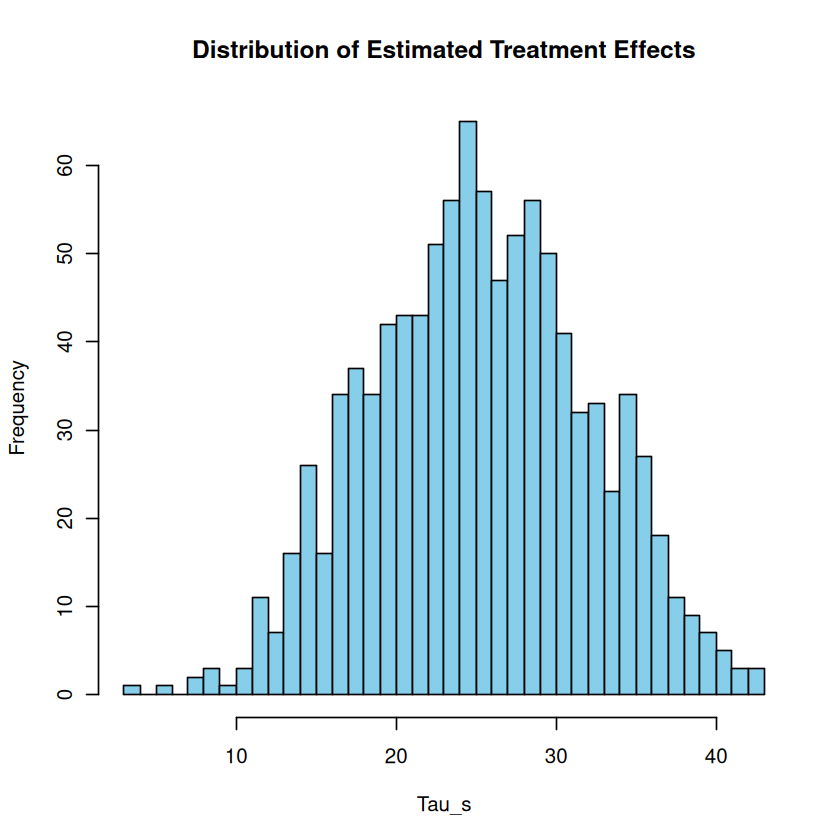

 

What the Figure Shows

Your plot:

Blue dots = estimated CATE (tau_s) for each customer

x-axis = age

y-axis = treatment effect of sending an email (extra dollars spent)

Red curve = smoothed trend (LOWESS)

What you see:

High CATE for young customers (age 20–30): ~33–40

Lower CATE for older customers (age 50–70): ~20–25

The red line decreases with age :

👉 The model discovered that older customers respond less to emails.



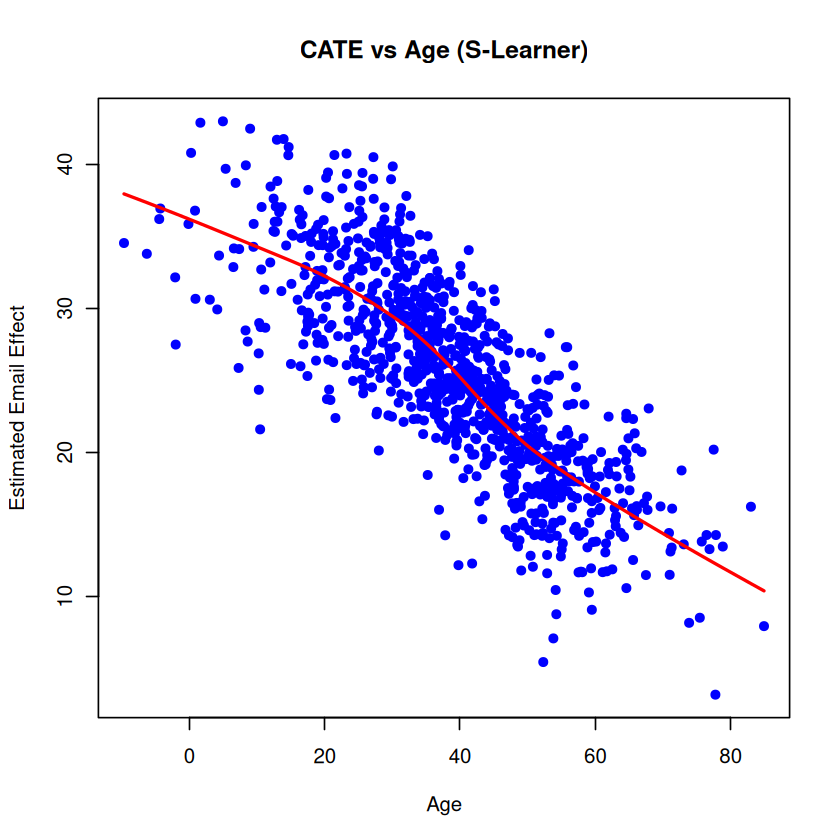

In [10]:
cat("S - LEARNER")

# S-Learner
s_model <- randomForest(Y ~ age + income + past_purchases + W, data = customers)
s_model
tau_s <- predict(s_model, cbind(X, W = 1)) - predict(s_model, cbind(X, W = 0))
head(tau_s)

hist(tau_s, breaks = 30, col = "skyblue",
     main = "Distribution of Estimated Treatment Effects",
     xlab = "Tau_s")

cat("

Interpretation

A wide spread → model is picking up heterogeneity

A narrow spread → model is not detecting variation

")

plot(customers$age, tau_s, pch = 16, col = "blue",
     xlab = "Age", ylab = "Estimated Email Effect",
     main = "CATE vs Age (S-Learner)")
lines(lowess(customers$age, tau_s), col = "red", lwd = 2)
abline(h = 0, lty = 2)

cat(" 

What the Figure Shows

Your plot:

Blue dots = estimated CATE (tau_s) for each customer

x-axis = age

y-axis = treatment effect of sending an email (extra dollars spent)

Red curve = smoothed trend (LOWESS)

What you see:

High CATE for young customers (age 20–30): ~33–40

Lower CATE for older customers (age 50–70): ~20–25

The red line decreases with age :

👉 The model discovered that older customers respond less to emails.

")

 ✅ Main Interpretation : 

The treatment effect slightly decreases with income

Look at the red LOWESS curve:

At low income (~$0–$20k): effect ≈ 30

Middle income (~$40k–$60k): effect dips slightly ≈ 27–28

High income (~$80k–$120k): effect ≈ 24–26

👉 The trend is downward: higher-income customers respond slightly less to the email.



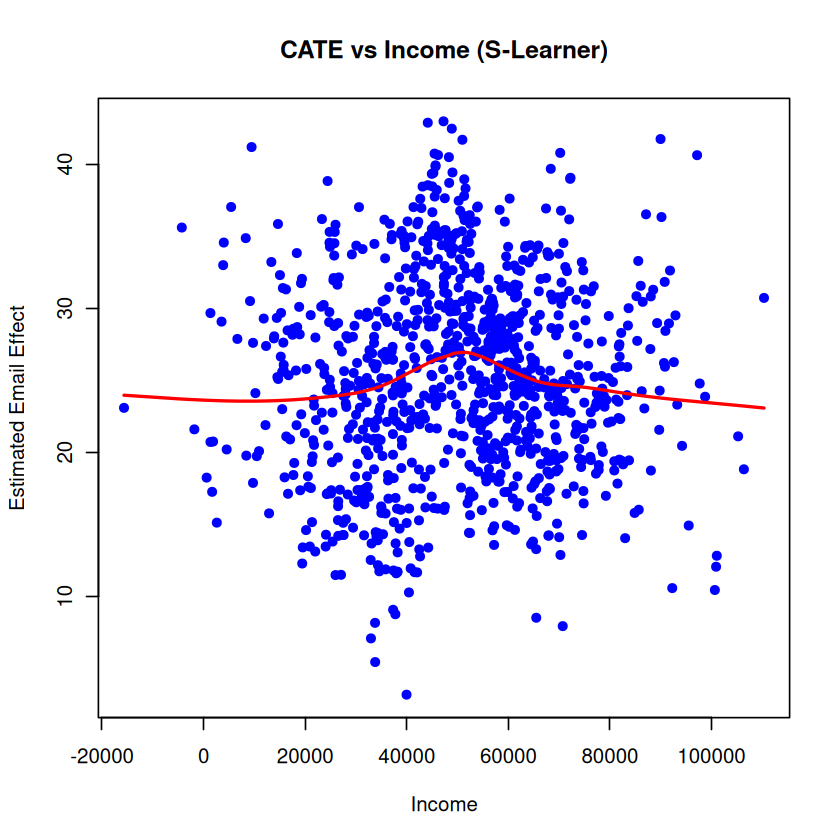

 

🔍 Main Interpretation

1. The email works for everyone

All CATE estimates are:

Above ~10

Mostly in the 25–35 range

👉 The discount email causes people to spend more, regardless of past purchase history.

🔍 2. The treatment effect declines slightly as past purchases increase

Look at the red curve:

At 0–2 past purchases → effect ≈ 30–32

Around 5–7 past purchases → effect ≈ 27–28

At 10–12 past purchases → effect ≈ 23–25

📉 Trend:
More frequent buyers respond slightly less to the email.



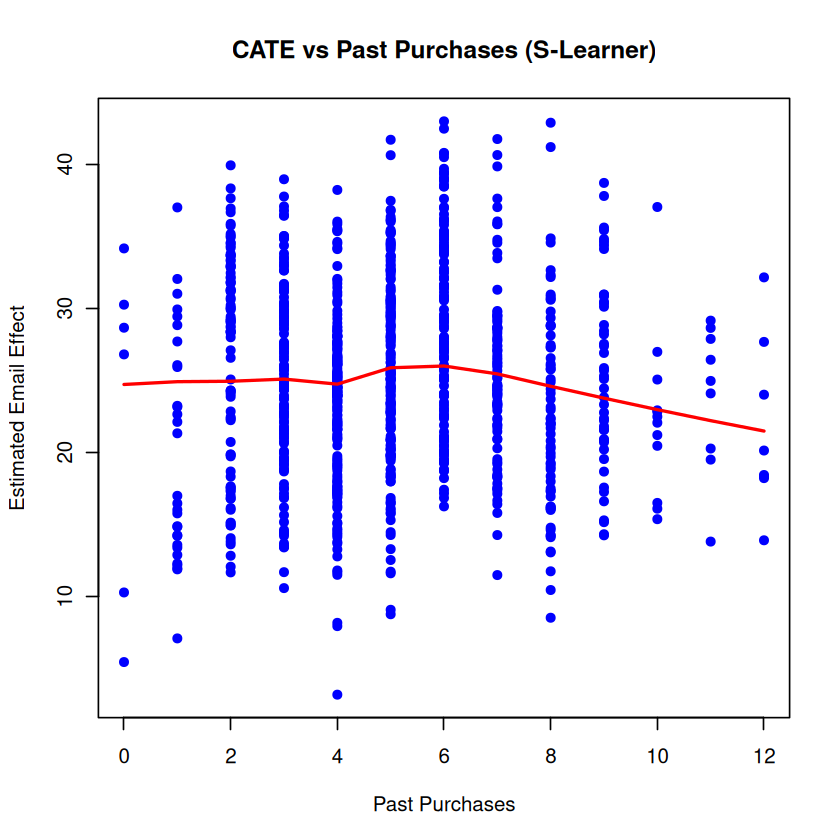

In [11]:
# CATE vs Income
plot(customers$income, tau_s, pch = 16, col = "blue",
     xlab = "Income", ylab = "Estimated Email Effect",
     main = "CATE vs Income (S-Learner)")
lines(lowess(customers$income, tau_s), col = "red", lwd = 2)
abline(h = 0, lty = 2)

cat(" ✅ Main Interpretation : 

The treatment effect slightly decreases with income

Look at the red LOWESS curve:

At low income (~$0–$20k): effect ≈ 30

Middle income (~$40k–$60k): effect dips slightly ≈ 27–28

High income (~$80k–$120k): effect ≈ 24–26

👉 The trend is downward: higher-income customers respond slightly less to the email.

")

# CATE vs Past Purchases
plot(customers$past_purchases, tau_s, pch = 16, col = "blue",
     xlab = "Past Purchases", ylab = "Estimated Email Effect",
     main = "CATE vs Past Purchases (S-Learner)")
lines(lowess(customers$past_purchases, tau_s), col = "red", lwd = 2)
abline(h = 0, lty = 2)

cat(" 

🔍 Main Interpretation

1. The email works for everyone

All CATE estimates are:

Above ~10

Mostly in the 25–35 range

👉 The discount email causes people to spend more, regardless of past purchase history.

🔍 2. The treatment effect declines slightly as past purchases increase

Look at the red curve:

At 0–2 past purchases → effect ≈ 30–32

Around 5–7 past purchases → effect ≈ 27–28

At 10–12 past purchases → effect ≈ 23–25

📉 Trend:
More frequent buyers respond slightly less to the email.

")

In [12]:
cat("S LEARNER")

S LEARNER

In [13]:
# Data
customers <- data.frame(
  age = rnorm(1000, 40, 15),
  income = rnorm(1000, 50000, 20000),
  past_purchases = rpois(1000, 5),
  email_sent = rbinom(1000, 1, 0.5),  # Treatment
  purchase_amount = numeric(1000)      # Outcome
)

# True heterogeneous effect: works better for younger customers
customers$purchase_amount <- 100 + 
  2 * customers$income/1000 + 
  5 * customers$past_purchases +
  customers$email_sent * (50 - 0.5 * customers$age) +
  rnorm(1000, 0, 20)

# Compare meta-learners
X <- customers[, c("age", "income", "past_purchases")]
W <- customers$email_sent
Y <- customers$purchase_amount

# S-Learner - CORRECTED
library(randomForest)

data_s <- data.frame(X, W = W)
head(data_s)

s_model <- randomForest(Y ~ age + income + past_purchases + W, data = data_s)
s_model

# Create proper data frames for prediction
X_treated <- data.frame(X, W = 1)
X_control <- data.frame(X, W = 0)

tau_s <- predict(s_model, X_treated) - predict(s_model, X_control)

head(X_treated)
head(X_control)

head(tau_s)

,age,income,past_purchases,W
,<dbl>,<dbl>,<int>,<int>
1,41.12796,36116.30,8,0
2,52.03664,34462.66,4,0
3,57.08863,32151.80,7,0
4,45.91167,89905.31,6,0
5,40.45016,39256.94,3,0
6,55.15552,45590.41,0,0



Call:
 randomForest(formula = Y ~ age + income + past_purchases + W,      data = data_s) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 738.0194
                    % Var explained: 68.25

,age,income,past_purchases,W
,<dbl>,<dbl>,<int>,<dbl>
1,41.12796,36116.30,8,1
2,52.03664,34462.66,4,1
3,57.08863,32151.80,7,1
4,45.91167,89905.31,6,1
5,40.45016,39256.94,3,1
6,55.15552,45590.41,0,1


,age,income,past_purchases,W
,<dbl>,<dbl>,<int>,<dbl>
1,41.12796,36116.30,8,0
2,52.03664,34462.66,4,0
3,57.08863,32151.80,7,0
4,45.91167,89905.31,6,0
5,40.45016,39256.94,3,0
6,55.15552,45590.41,0,0


1        2        3        4        5        6 
25.28573 31.08048 27.99475 34.79994 28.49136 19.68609

In [14]:
cat("T LEARNER")

T LEARNER

,age,income,past_purchases,Y
,<dbl>,<dbl>,<int>,<dbl>
7,48.44372,53896.81,3,261.7417
8,47.65594,30257.66,8,226.2809
11,41.59116,40668.18,2,217.2437
12,58.35514,63208.17,11,334.3260
15,21.43158,35453.00,5,218.0403
17,23.97268,82590.35,5,307.8367


,age,income,past_purchases,Y
,<dbl>,<dbl>,<int>,<dbl>
1,41.12796,36116.30,8,236.8120
2,52.03664,34462.66,4,207.4055
3,57.08863,32151.80,7,189.3766
4,45.91167,89905.31,6,293.2407
5,40.45016,39256.94,3,191.6705
6,55.15552,45590.41,0,203.9771




Main insights :

📉 Younger customers benefit more

The trend line slopes downward for ages roughly 0–40, meaning:

Younger customers tend to spend more because of the discount email.

Many customers under ~40 see an email lift of $30–50 or more.

📌 Middle-aged customers have a smaller effect

Around ages 40–60, the estimated effect drops to around $20–30.

The email is still effective, but less so.

📈 Slight uptick for older customers

After age 60, the trend line flattens and even rises slightly:

Older customers still respond, though the effect remains lower compared to younger customers.



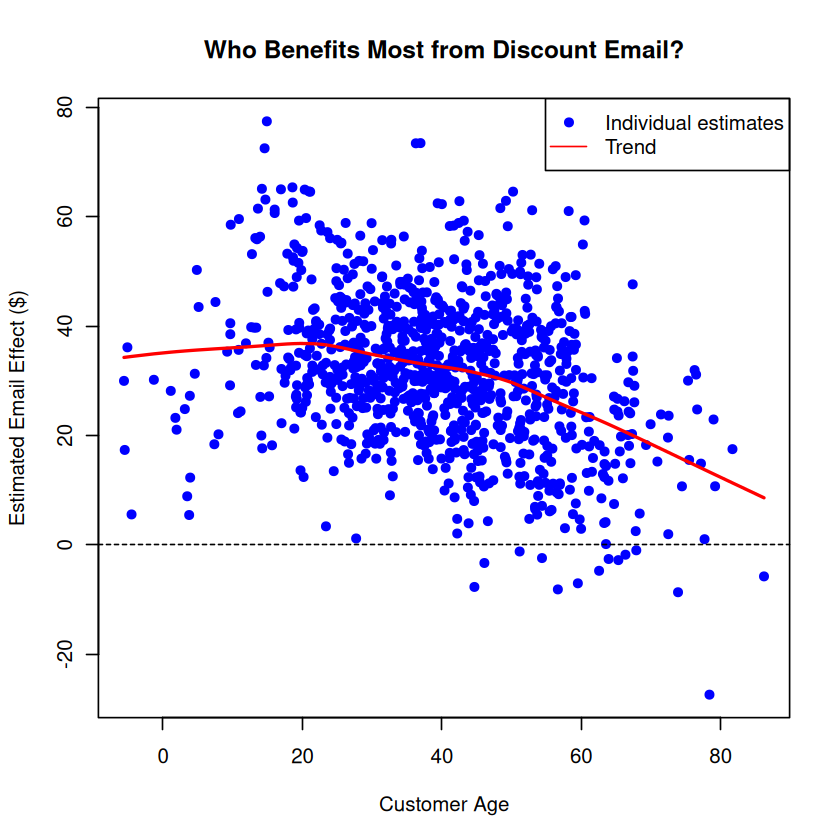

In [15]:
# T-Learner - CORRECTED
data_treated <- data.frame(X, Y = Y)[W == 1, ]
data_control <- data.frame(X, Y = Y)[W == 0, ]

head(data_treated)
head(data_control)

t1 <- randomForest(Y ~ age + income + past_purchases, data = data_treated)
t0 <- randomForest(Y ~ age + income + past_purchases, data = data_control)

tau_t <- predict(t1, X) - predict(t0, X)

# Visualize heterogeneity
plot(customers$age, tau_t, col = "blue", pch = 16,
     xlab = "Customer Age", ylab = "Estimated Email Effect ($)",
     main = "Who Benefits Most from Discount Email?")
abline(h = 0, lty = 2)

# Add smooth trend line
lines(lowess(customers$age, tau_t), col = "red", lwd = 2)
legend("topright", c("Individual estimates", "Trend"), 
       col = c("blue", "red"), pch = c(16, NA), lty = c(NA, 1))

cat("

Main insights :

📉 Younger customers benefit more

The trend line slopes downward for ages roughly 0–40, meaning:

Younger customers tend to spend more because of the discount email.

Many customers under ~40 see an email lift of $30–50 or more.

📌 Middle-aged customers have a smaller effect

Around ages 40–60, the estimated effect drops to around $20–30.

The email is still effective, but less so.

📈 Slight uptick for older customers

After age 60, the trend line flattens and even rises slightly:

Older customers still respond, though the effect remains lower compared to younger customers.

")



Main Interpretation :The email has a positive causal effect for nearly everyone

The vast majority of estimates are:

well above 20, many between 30–50

only a tiny number near or below 0

👉 Email increases spending strongly across all income levels.



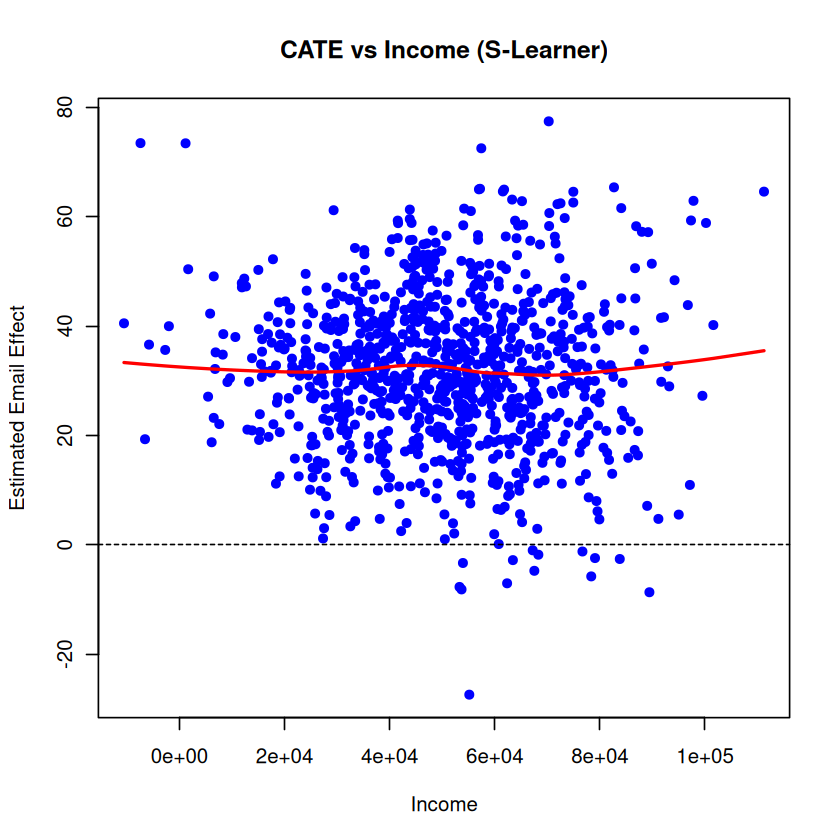

In [16]:
# CATE vs Income
plot(customers$income, tau_t, pch = 16, col = "blue",
     xlab = "Income", ylab = "Estimated Email Effect",
     main = "CATE vs Income (S-Learner)")
lines(lowess(customers$income, tau_t), col = "red", lwd = 2)
abline(h = 0, lty = 2)

cat("

Main Interpretation :The email has a positive causal effect for nearly everyone

The vast majority of estimates are:

well above 20, many between 30–50

only a tiny number near or below 0

👉 Email increases spending strongly across all income levels.

")

 Main Interpretation

1. The email increases spending for all groups

Most estimates lie between 20 and 40, some even as high as 60–80.

Very few points fall below 0.

👉 The email is beneficial across all levels of customer purchase history.
👉 No purchase group shows negative average effects.

2. Effect is largest for customers with few past purchases



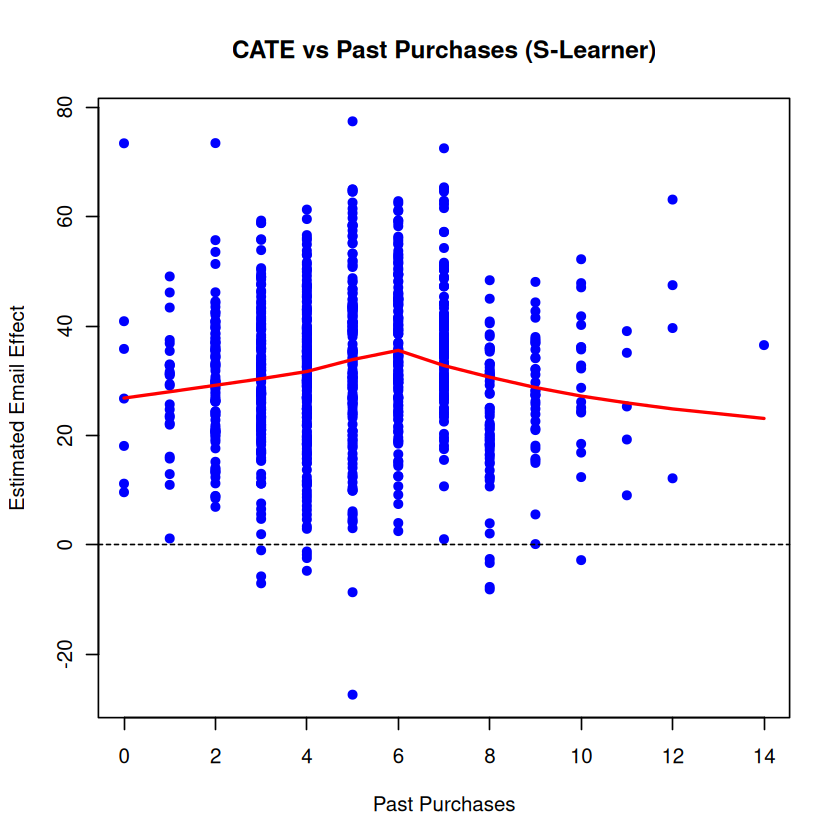

In [17]:
# CATE vs Past Purchases
plot(customers$past_purchases, tau_t, pch = 16, col = "blue",
     xlab = "Past Purchases", ylab = "Estimated Email Effect",
     main = "CATE vs Past Purchases (S-Learner)")
lines(lowess(customers$past_purchases, tau_t), col = "red", lwd = 2)
abline(h = 0, lty = 2)

cat(" Main Interpretation

1. The email increases spending for all groups

Most estimates lie between 20 and 40, some even as high as 60–80.

Very few points fall below 0.

👉 The email is beneficial across all levels of customer purchase history.
👉 No purchase group shows negative average effects.

2. Effect is largest for customers with few past purchases

")

In [18]:
cat("UPLIFT")

UPLIFT

In [19]:
cat("UPLIFT :

It is the key idea behind why we use meta-learners and CATE curves in marketing, personalization, and causal ML.

✅ What Uplift Means in This Context

In causal inference for marketing:

UPLIFT = the causal effect of the email on each individual.

Where:

Y(1) = outcome if the customer receives the email

Y(0) = outcome if the customer does NOT receive the email

X = customer features (age, income, past purchases, etc.)

This uplift is exactly what your S-learner estimated: 

So UPLIFT = CATE = treatment effect.

🎯 Why Uplift Matters

Traditional marketing asks: “Does the email work on average?”

But uplift modeling asks: “WHO does the email work for?”

That’s a much more powerful question.

Different customers have different treatment effects, so the same email can:

strongly increase spending for some

have almost no effect on others

(in real-world datasets) sometimes even reduce spending for certain groups.

")

UPLIFT :

It is the key idea behind why we use meta-learners and CATE curves in marketing, personalization, and causal ML.

✅ What Uplift Means in This Context

In causal inference for marketing:

UPLIFT = the causal effect of the email on each individual.

Where:

Y(1) = outcome if the customer receives the email

Y(0) = outcome if the customer does NOT receive the email

X = customer features (age, income, past purchases, etc.)

This uplift is exactly what your S-learner estimated: 

So UPLIFT = CATE = treatment effect.

🎯 Why Uplift Matters

Traditional marketing asks: “Does the email work on average?”

But uplift modeling asks: “WHO does the email work for?”

That’s a much more powerful question.

Different customers have different treatment effects, so the same email can:

strongly increase spending for some

have almost no effect on others

(in real-world datasets) sometimes even reduce spending for certain groups.



In [20]:
cat("

📈 Uplift in Your Plots

For example:

CATE vs Age

You saw that uplift:

is very high for young customers

steadily decreases with age

So uplift modeling tells you:

Send the email more aggressively to younger customers.

CATE vs Past Purchases

You saw that uplift :

is largest for low-purchase customers

decreases for heavy buyers

Meaning:

The email is more effective for disengaged or infrequent buyers.

CATE vs Income

You saw:

uplift is fairly strong across all income levels

slight U-shaped pattern (low+high income respond more)

Meaning:

Income is a weak effect modifier, but the treatment still works for nearly everyone.

")



📈 Uplift in Your Plots

For example:

CATE vs Age

You saw that uplift:

is very high for young customers

steadily decreases with age

So uplift modeling tells you:

Send the email more aggressively to younger customers.

CATE vs Past Purchases

You saw that uplift :

is largest for low-purchase customers

decreases for heavy buyers

Meaning:

The email is more effective for disengaged or infrequent buyers.

CATE vs Income

You saw:

uplift is fairly strong across all income levels

slight U-shaped pattern (low+high income respond more)

Meaning:

Income is a weak effect modifier, but the treatment still works for nearly everyone.



In [21]:
cat("

📈 What Is an Uplift Curve?

An uplift curve shows the cumulative gain in outcome (e.g. conversions, revenue) from targeting individuals based on predicted uplift.

It compares:

Treatment group outcomes

Control group outcomes

Ordered by predicted uplift

📊 What Is the Qini Coefficient?

The Qini coefficient is a generalization of the Gini coefficient for uplift models. 

It measures the area between the actual uplift curve and the random targeting baseline. 

A higher Qini means better targeting.

")



📈 What Is an Uplift Curve?

An uplift curve shows the cumulative gain in outcome (e.g. conversions, revenue) from targeting individuals based on predicted uplift.

It compares:

Treatment group outcomes

Control group outcomes

Ordered by predicted uplift

📊 What Is the Qini Coefficient?

The Qini coefficient is a generalization of the Gini coefficient for uplift models. 

It measures the area between the actual uplift curve and the random targeting baseline. 

A higher Qini means better targeting.



 Step-by-Step: From CATE → Uplift Curve → Qini :


Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in data$outcome[data$treated == 1] - data$outcome[data$treated == :
“longer object length is not a multiple of shorter object length”



Qini Coefficient: -0.064 


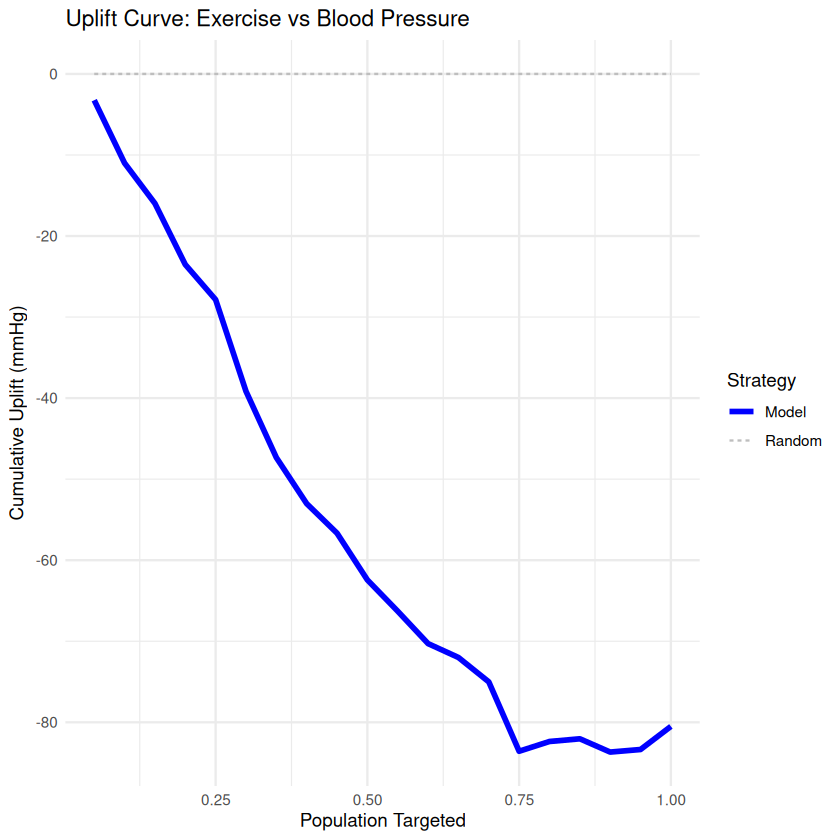

In [22]:
cat(" Step-by-Step: From CATE → Uplift Curve → Qini :") 

# === UPLIFT MODELING: EXERCISE EFFECT ON BLOOD PRESSURE ===

library(dplyr)
library(ggplot2)
library(grf)

# 1. Simulate Data
set.seed(123)
n <- 2000

data <- data.frame(
  age = runif(n, 20, 70),
  bmi = rnorm(n, 27, 5),
  smoker = rbinom(n, 1, 0.3),
  treated = rbinom(n, 1, 0.5)
)

# True treatment effect (CATE): varies by age, bmi, smoking
true_effect <- with(data, -5 + 0.1*age - 0.2*bmi + 3*smoker + 0.05*age*smoker)

# Simulate outcomes
baseline <- 120 + 0.5*data$age + 1.2*data$bmi + 5*data$smoker + rnorm(n, 0, 8)
treated_outcome <- baseline + true_effect
data$outcome <- ifelse(data$treated == 1, treated_outcome, baseline)

# 2. Fit Causal Forest
features <- data %>% select(age, bmi, smoker)
cf_model <- causal_forest(features, data$outcome, data$treated, num.trees = 2000)
data$uplift <- predict(cf_model)$predictions

# 3. Compute Uplift Curve
get_uplift_curve <- function(df, n_bins = 20) {
  df <- df %>%
    arrange(desc(uplift)) %>%
    mutate(bin = ntile(uplift, n_bins)) %>%
    group_by(bin) %>%
    summarise(
      pct = n() / nrow(df),
      uplift = mean(outcome[treated == 1]) - mean(outcome[treated == 0])
    ) %>%
    mutate(cum_pct = cumsum(pct), cum_uplift = cumsum(uplift), baseline = 0)
  return(df)
}

curve <- get_uplift_curve(data)

# 4. Plot Uplift Curve
ggplot(curve, aes(x = cum_pct)) +
  geom_line(aes(y = cum_uplift, color = "Model"), size = 1.2) +
  geom_line(aes(y = baseline, color = "Random"), linetype = "dashed") +
  labs(
    title = "Uplift Curve: Exercise vs Blood Pressure",
    x = "Population Targeted",
    y = "Cumulative Uplift (mmHg)",
    color = "Strategy"
  ) +
  theme_minimal() +
  scale_color_manual(values = c("Model" = "blue", "Random" = "gray"))

# 5. Compute Qini Coefficient
compute_qini <- function(curve) {
  auc_model <- sum(diff(curve$cum_pct) * (curve$cum_uplift[-1] + curve$cum_uplift[-nrow(curve)]) / 2)
  auc_max <- sum(sort(data$outcome[data$treated == 1] - data$outcome[data$treated == 0], decreasing = TRUE)[1:nrow(curve)])
  return(auc_model / auc_max)
}

qini <- compute_qini(curve)
cat("\nQini Coefficient:", round(qini, 3), "\n")


In [23]:
head(customers)

,age,income,past_purchases,email_sent,purchase_amount
,<dbl>,<dbl>,<int>,<int>,<dbl>
1,41.12796,36116.30,8,0,236.8120
2,52.03664,34462.66,4,0,207.4055
3,57.08863,32151.80,7,0,189.3766
4,45.91167,89905.31,6,0,293.2407
5,40.45016,39256.94,3,0,191.6705
6,55.15552,45590.41,0,0,203.9771


In [24]:
cat("

1️⃣ What is an uplift curve?

Conceptually:

You rank customers from highest to lowest predicted uplift (tau_s).

2️⃣ What is the Qini Index?

The Qini Index (or Qini coefficient) is the standard performance metric for uplift models.
It is to uplift modeling what AUC is to classification.

🔍 Conceptually:

The Qini Index measures how much better your uplift model is
at targeting the right customers compared to random targeting.

In other words:

How much extra gain (uplift) do you achieve by following your model instead of picking people randomly?

If your model assigns high uplift scores to the customers who truly benefit most from treatment, your Qini Index will be large.

If your model is no better than random, your Qini Index will be zero.

")



1️⃣ What is an uplift curve?

Conceptually:

You rank customers from highest to lowest predicted uplift (tau_s).

2️⃣ What is the Qini Index?

The Qini Index (or Qini coefficient) is the standard performance metric for uplift models.
It is to uplift modeling what AUC is to classification.

🔍 Conceptually:

The Qini Index measures how much better your uplift model is
at targeting the right customers compared to random targeting.

In other words:

How much extra gain (uplift) do you achieve by following your model instead of picking people randomly?

If your model assigns high uplift scores to the customers who truly benefit most from treatment, your Qini Index will be large.

If your model is no better than random, your Qini Index will be zero.



In [25]:
cat("

🎯 Why Qini Index matters

Uplift modeling is not just prediction — it’s ranking:

Who should we treat first?

Who generates the biggest incremental effect?

Who should we avoid treating (negative uplift)?

The Qini Index evaluates how correct this ranking is.

📈 How Qini is computed (intuitive explanation)

Sort customers by predicted uplift (highest → lowest)

For each fraction (10%, 20%, ..., 100%):

Compute the incremental effect of treating those customers
(treated mean – control mean)

Plot the cumulative incremental gain → uplift curve

The Qini Index is:

Area between the uplift curve and the “random” baseline
Area between the uplift curve and the “random” baseline

This area = extra uplift your model generates.

⭐ Interpretation

Qini > 0
→ Model is better than random targeting

Qini = 0
→ No better than random

Higher Qini
→ Better uplift model (stronger ability to correctly rank customers by treatment effect)

There is no fixed maximum. It depends on the dataset.

🧠 Quick definition (one sentence)

The Qini Index measures the incremental impact gained by using the uplift model for targeting, compared to random allocation.

")



🎯 Why Qini Index matters

Uplift modeling is not just prediction — it’s ranking:

Who should we treat first?

Who generates the biggest incremental effect?

Who should we avoid treating (negative uplift)?

The Qini Index evaluates how correct this ranking is.

📈 How Qini is computed (intuitive explanation)

Sort customers by predicted uplift (highest → lowest)

For each fraction (10%, 20%, ..., 100%):

Compute the incremental effect of treating those customers
(treated mean – control mean)

Plot the cumulative incremental gain → uplift curve

The Qini Index is:

Area between the uplift curve and the “random” baseline
Area between the uplift curve and the “random” baseline

This area = extra uplift your model generates.

⭐ Interpretation

Qini > 0
→ Model is better than random targeting

Qini = 0
→ No better than random

Higher Qini
→ Better uplift model (stronger ability to correctly rank customers by treatment effect)

There is no fixed maximum. It depends on the dataset.

🧠 Quick d